# Analysis Of Football Fans Comments on Facebook

This project aims to describe and summarize various conditions, situations, or phenomena of social reality in a study population and generalize results for a broader population.

This analysis aimed to explore and understand the dynamics of football fans' comments on Facebook, specifically focusing on posts related to Arsenal and Real Madrid. The dataset, obtained from Apify, includes information about the comments, such as author details, comment counts, and reaction counts.

Method of analysis that will be used is discourse analysis,  an in-depth examination of written, spoken, non-verbal, and visual language. It is used to analyze the language within its social context, considering societal norms, political climate, time, place, intended audience, and socio-cultural background of the speaker. 

These can be achieved by understanding the distribution of other factora inn the data, analyzing comment and reaction counts to identify patterns in engagement and using NLP for sentiment analysis on comments to understand the overall tone.

## Insightful Questions

1. What is the percentage of different discourse expressed by football fans on Facebook
2. Does Football Fans Gender influence the discourse of comments on Facebook
3. Does Verification Status of Author influence the discourse of comment on Facebook
4. What Demographic Engagement Pattern can be identified with respect to different discourse of comment on Facebook
5. What are the Prevalent words expressed in comments by football fans on Facebook
6. What are the common words expressed in positive comments by football fans
7. What are the common words in hate/negative discourse expressed by football fans against soccer players on Facebook?


We will start by importing the necessary libraries needed

In [1]:
#importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings

In [2]:
# importing the dataset using a function in pandas library
comments_data = pd.read_excel('arsenal_realmadrid_comment_data.xlsx')
# let's output the first 10 rows of the dataset to inspect the dataset
comments_data.head(10)

,author_gender,author_id,author_is_verified,author_name,author_picture,author_short_name,author_url,comment_count,reaction_count,text,url
0,MALE,669558102,False,Steve Virgin,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,Steve,https://www.facebook.com/m9spv,2.0,1.0,49/61 - I couldn't remember what Norwich's gro...,https://www.facebook.com/Arsenal/posts/pfbid02...
1,FEMALE,100009238158905,False,Nabagereka Angel,https://scontent-iad3-1.xx.fbcdn.net/v/t1.6435...,Angel,https://www.facebook.com/ainembabazi.angel.94,0.0,2.0,I remember in 1992 when we won against Blackbu...,https://www.facebook.com/Arsenal/posts/pfbid02...
2,MALE,100008600747506,False,Mwisheni Kevin,https://scontent-iad3-1.xx.fbcdn.net/v/t1.6435...,Mwisheni,https://www.facebook.com/profile.php?id=100008...,1.0,13.0,"Wembley, Emirates and our training ground old ...",https://www.facebook.com/Arsenal/posts/pfbid02...
3,MALE,100000477393267,False,Gitaari Samuel Waichinga,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,Waichinga,https://www.facebook.com/sgitaari,0.0,0.0,"Maine Road - Manchester City, Wonga National P...",https://www.facebook.com/Arsenal/posts/pfbid02...
4,MALE,100000106548615,False,Meshack Korir,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,Meshack,https://www.facebook.com/meshack.kiprono1,0.0,3.0,Conley\nHighbury\nEmirates stadium.,https://www.facebook.com/Arsenal/posts/pfbid02...
5,MALE,100037936131628,False,Rey Chima,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,Rey,https://www.facebook.com/neo.chima.5,1.0,3.0,Hey gunners \nToday happens to be my birthday 🎉,https://www.facebook.com/Arsenal/posts/pfbid02...
6,MALE,1080370042,False,Ben KaIcher,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,Ben,https://www.facebook.com/bkalcher,0.0,2.0,45/61. I'll take that. Difficult when my phone...,https://www.facebook.com/Arsenal/posts/pfbid02...
7,MALE,100093011416126,False,Barry Swane,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,Swane,https://www.facebook.com/profile.php?id=100093...,0.0,1.0,Wembley\nHighbury &\nEmirates,https://www.facebook.com/Arsenal/posts/pfbid02...
8,MALE,61550792998702,False,Jamilu Usman,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,Jamilu,https://www.facebook.com/profile.php?id=615507...,0.0,1.0,London Conley\nHighbury stadium\nEmirates stad...,https://www.facebook.com/Arsenal/posts/pfbid02...
9,MALE,100001721323149,False,Irvin Barnett,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,Irvin,https://www.facebook.com/irvin.barnett,0.0,2.0,I'm Arsenal fan but I am sorry to say. I cann...,https://www.facebook.com/Arsenal/posts/pfbid02...


## Exploratory Data Analysis (EDA)

In [3]:
#let's output the output the data information for in-depth inspection
comments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author_gender       1394 non-null   object 
 1   author_id           1394 non-null   int64  
 2   author_is_verified  1394 non-null   bool   
 3   author_name         1394 non-null   object 
 4   author_picture      1394 non-null   object 
 5   author_short_name   1394 non-null   object 
 6   author_url          1394 non-null   object 
 7   comment_count       1344 non-null   float64
 8   reaction_count      797 non-null    float64
 9   text                792 non-null    object 
 10  url                 547 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 110.4+ KB


## Obsevations from the dataset

The dataset consists of 12 columns and 1394 rows.

There is a need to drop some columns that is not needed in for the result of our analysis.

There are missing values in the the url, text and reaction count columns which will be dropped. 

## Data Cleaning

In [4]:
comments_data.drop(['url','author_id','author_name','author_picture','author_short_name','author_url'],axis=1,inplace=True)

In [5]:
comments_data.dropna(axis=0,inplace=True)

## Descriptive Analysis

In [6]:
verification_status_count = comments_data['author_is_verified'].value_counts()
verification_status_count

False    790
True       2
Name: author_is_verified, dtype: int64

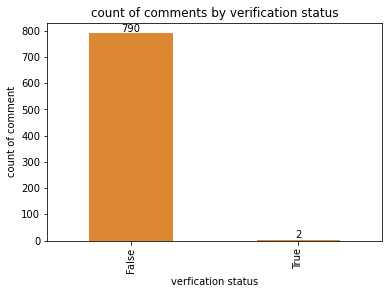

In [7]:
verification_status_count.plot(kind='bar', color='#d83')
plt.xlabel('verfication status')
plt.ylabel('count of comment')
plt.title('count of comments by verification status')
for index, value in enumerate(verification_status_count):
    plt.text(index, value, str(value), ha='center',va='bottom')
plt.show()

over 99% of the users are using unverfied account while less than 1% of the users are using verified account

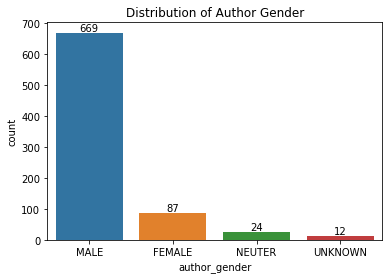

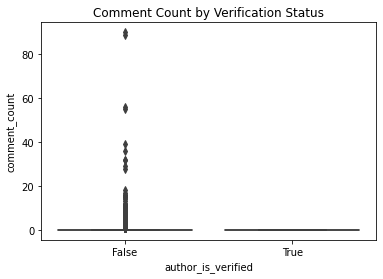

In [8]:
# Understand the distribution of author_gender and author_is_verified
sns.countplot(x='author_gender', data=comments_data)
plt.title('Distribution of Author Gender')
# Add value text to each bar
for index, value in enumerate(comments_data['author_gender'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

sns.boxplot(x='author_is_verified', y='comment_count', data=comments_data)
plt.title('Comment Count by Verification Status')
plt.show()

The above visuals shows that the gender with highest no of comments is the male gender with more than 60 counts, then the female gender and neuter gender while there are very few comments with unknown gender.

Most of the authors are not verified while only few has verified accounts.

In [9]:
#Explore summary statistics of comment_count and reaction_count
comments_data.describe()

,comment_count,reaction_count
count,792.000000,792.000000
mean,1.375000,7.023990
std,6.377864,26.816899
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,5.000000
max,90.000000,483.000000


The statistic summary shows the average comment_count to be 1.375 and reaction count 7,023, it also shows that more than 75% of the comment_count is 0 and about 50% of the reaction ranges from 0 to 1 and remaining from 5 to 483 reaction_ counts.

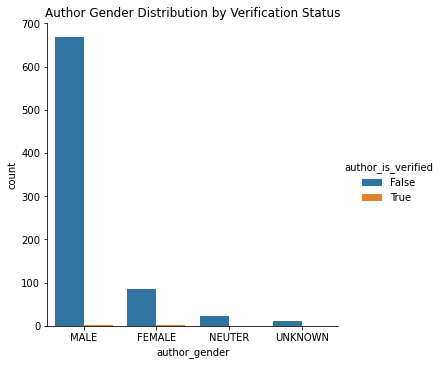

In [10]:
# using seaborn to create a  categorical plot to explore the distribution of author gender based on verification status
sns.catplot(x='author_gender', hue='author_is_verified', kind='count', data=comments_data)
plt.title('Author Gender Distribution by Verification Status')
plt.show()


The plot shows that only the female and male gender authors has very few verified account while none of the neuter and unknown gender has a verified account

In [11]:
gender_comment_counts = comments_data.groupby('author_gender')['comment_count'].mean()
gender_comment_counts

author_gender
FEMALE     0.459770
MALE       1.481315
NEUTER     0.666667
UNKNOWN    3.500000
Name: comment_count, dtype: float64

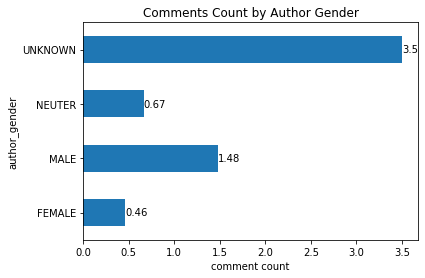

In [12]:
gender_comment_counts.plot(kind='barh')
plt.xlabel('comment count')
plt.title('Comments Count by Author Gender')
for index, value in enumerate(gender_comment_counts):
    plt.text(value, index, str(round(value, 2)), ha='left', va='center')

plt.show()

On average, female authors contribute around 0.46 comments, indicating a relatively lower engagement level compared to other gender groups.

Male authors, on the other hand, have a higher average comment count of approximately 1.48, suggesting a more active participation in commenting.

Authors with a neuter gender have an average comment count of about 0.67.

Authors with an unknown gender, surprisingly, have the highest average comment count of 3.5. This could be due to various reasons, such as a smaller sample size or specific trends within this category.

In [13]:
verification_comment_counts = comments_data.groupby('author_is_verified')['comment_count'].mean()
verification_comment_counts

author_is_verified
False    1.378481
True     0.000000
Name: comment_count, dtype: float64

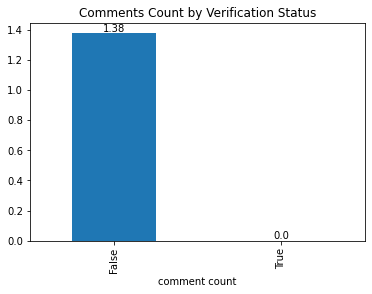

In [14]:
verification_comment_counts.plot(kind='bar')
plt.xlabel('comment count')
plt.title('Comments Count by Verification Status')
# Annotate each bar with its value
for index, value in enumerate(verification_comment_counts):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

Unverified authors have an average comment count of 1.38, showcasing consistent engagement across the majority of users.

Verified authors, however, have an average comment count of 0. This is an interesting finding that could be attributed to the small sample size of verified authors in the dataset.

In [15]:
gender_reaction_counts = comments_data.groupby('author_gender')['reaction_count'].mean()

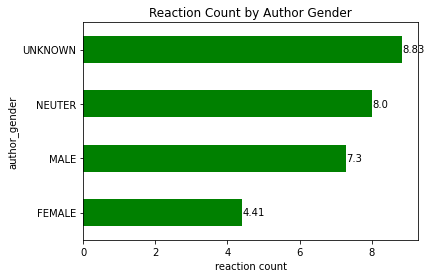

In [16]:
gender_reaction_counts.plot(kind='barh', color='green')
plt.xlabel('reaction count')
plt.title('Reaction Count by Author Gender')
for index, value in enumerate(gender_reaction_counts):
    plt.text(value, index, str(round(value, 2)), ha='left', va='center')

plt.show()

Female authors receive an average of approximately 4.41 reactions per comment.

Male authors receive a higher average of about 7.30 reactions per comment, indicating a potentially more engaged audience.

Authors with a neuter gender receive an average of 8 reactions per comment.

Authors with an unknown gender receive the highest average reactions, around 8.83 per comment.

In [17]:
verification_reaction_counts = comments_data.groupby('author_is_verified')['reaction_count'].mean()

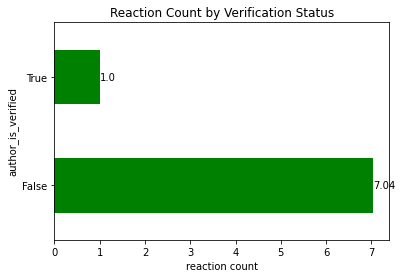

In [18]:
verification_reaction_counts.plot(kind='barh', color='green')
plt.xlabel('reaction count')
plt.title('Reaction Count by Verification Status')
for index, value in enumerate(verification_reaction_counts):
    plt.text(value, index, str(round(value, 2)), ha='left', va='center')

plt.show()

Unverified authors receive an average of 7.04 reactions per comment.

Verified authors, similar to the comment count, have an average reaction count of 1. This again may be influenced by the small sample size of verified authors.

# Discourse Analysis

## Using Sentiment Analysis Approach With nltk SentimentIntensityAnalyzer

We will the text variable (it contain the comment text) for discourse analysis.

Natural language processing (NLP) techniques will be applied to identify sentiment, themes, and patterns in comments.

In [19]:
# using sentiment intensity analyzer from natural language toolkit to identify themes and sentiment pattern
#classifying the comments into positive, negative and neutral comments
sia = SentimentIntensityAnalyzer()
#defining function to classify the comment
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"       

# Data Visualization

Using series of visuals to present and communicate findings

In [20]:
# defining funtion to create a bar plot and show the count and percentage of each cateory of comments 
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts_plot = counts.plot(kind='bar', ax=ax1, color='green')
    percent_plot = percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
   
    # Add annotations to the bar chart
    for i, value in enumerate(counts):
        counts_plot.text(i, value, str(value), ha='center', va='bottom')

    # Add annotations to the percentage chart
    for i, value in enumerate(percent):
        percent_plot.text(i, value , f"{value:.2%}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### 1. What is the percentage of different discourse expressed by football fans on facebook

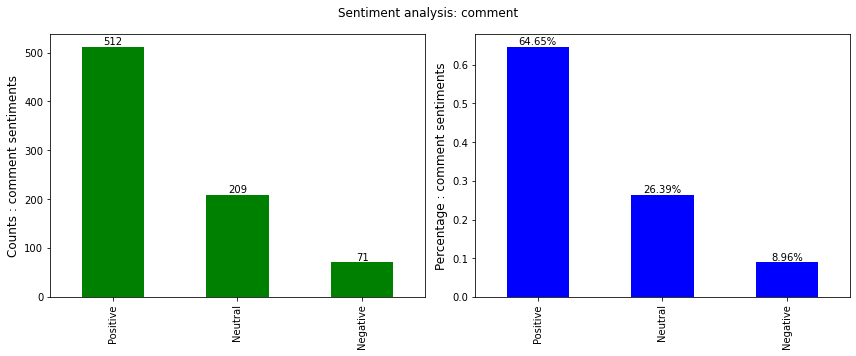

In [21]:
# Creating a column for the sentiment analysis results
comments_data['sentiment'] = comments_data['text'].dropna().apply(lambda x: find_sentiment(x))
#creating plot for count and percentage of comment sentiments
plot_sentiment(comments_data, 'sentiment', 'comment')

The visual above shows the result of the sentimental analysis on whole dataset with 64.65% of positive comments (512 counts), 26.39% of neutral comments (209 counts), and 8.96% of negative comments (71 counts)


### 2. Does Football Fans Gender influence the discourse of comments on facebook

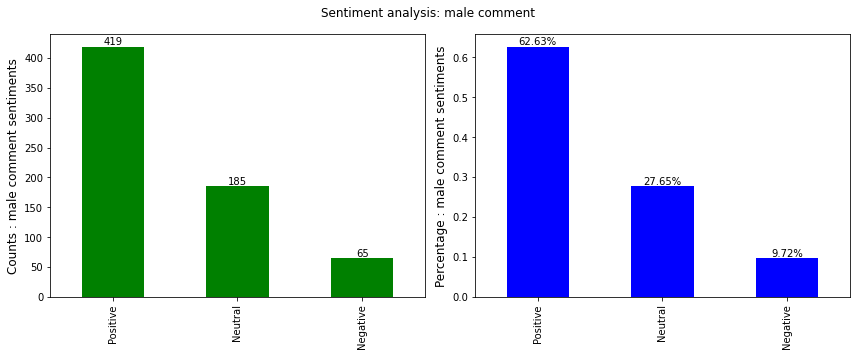

In [22]:
# extracting the dataset for male gender
male_comments = comments_data[comments_data['author_gender']=='MALE']
plot_sentiment(male_comments, 'sentiment', 'male comment')

The visual above shows the result of the sentimental analysis on comments for male gender with 62.63% of positive comments, 27.65% of neutral comments, and 9.72% of negative comments

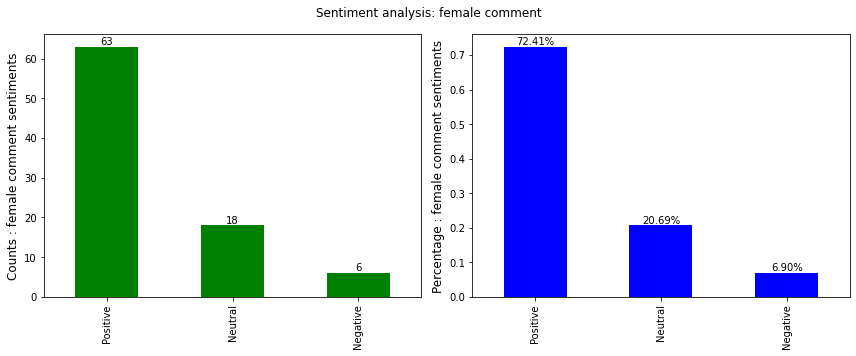

In [23]:
# extracting the dataset for female gender
female_comments = comments_data[comments_data['author_gender']=='FEMALE']
#creating plot for count and percentage of comment sentiments by female gender
plot_sentiment(female_comments, 'sentiment', 'female comment')

The visual above shows the result of the sentimental analysis on comments for female gender with 72.41% of positive comments , 20.69% of neutral comments, and 6.90% of negative comments

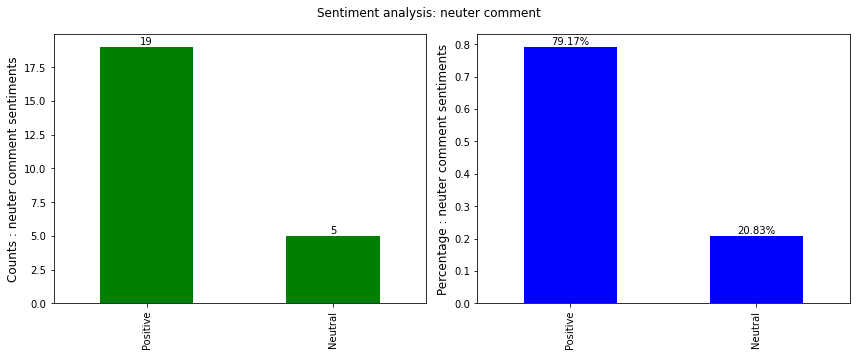

In [24]:
# extracting the dataset for neuter gender
neuter_comments = comments_data[comments_data['author_gender']=='NEUTER']
#creating plot for count and percentage of comment sentiments by neuter gender
plot_sentiment(neuter_comments, 'sentiment', 'neuter comment')

The visual above shows the result of the sentimental analysis on comments for neuter gender with 79.17% of positive comments and 20.83% of neutral comments with no negative comments

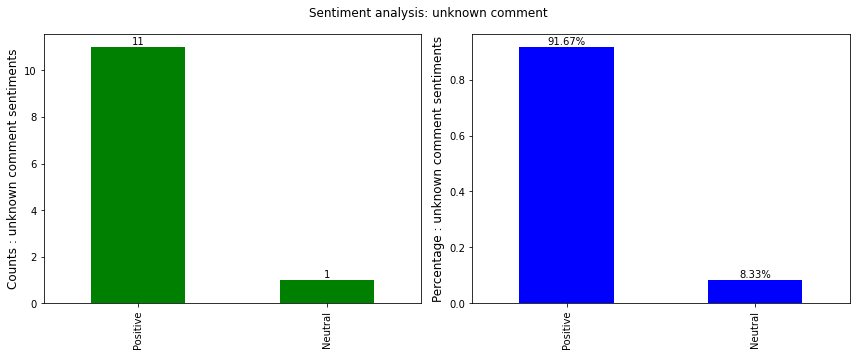

In [25]:
# extracting the dataset for unknown gender
unknown_comments = comments_data[comments_data['author_gender']=='UNKNOWN']
#creating plot for count and percentage of comment sentiments by unknown gender
plot_sentiment(unknown_comments, 'sentiment', 'unknown comment')

The visual above shows the result of the sentimental analysis on comments for unknown gender with 91.67% of positive comments and 8.33% of neutral comments with no negative comments

In [ ]:
# extracting the dataset for verified author
verified_comments = comments_data[comments_data['author_is_verified']==True]
#creating plot for count and percentage of comment sentiments by verified author
plot_sentiment(verified_comments, 'sentiment', 'verified comment')

Since we have only 2 verified user one of it has a positive comment while the other has a negative comment

### 3. Does Verification Status of Author influence the discourse of comment on facebook

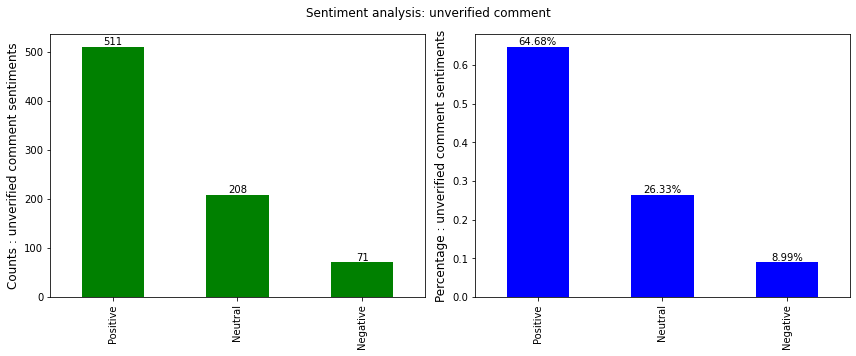

In [27]:
# extracting the dataset for verified author
unverified_comments = comments_data[comments_data['author_is_verified']==False]
#creating plot for count and percentage of comment sentiments by verified author
plot_sentiment(unverified_comments, 'sentiment', 'unverified comment')

In over 99% of unverified users, the result of the sentimental analysis on its comments is shown above with 64.68% of positive comments, 26.33% of neutral comments and 8.99% of negative comments

### 4. What Demographic Engagement Pattern can be identified with respect to different discourse of comment on Facebook

In [28]:
sentiment_comment_counts = comments_data.groupby('sentiment')['comment_count'].mean()
sentiment_comment_counts

sentiment
Negative    4.521127
Neutral     0.311005
Positive    1.373047
Name: comment_count, dtype: float64

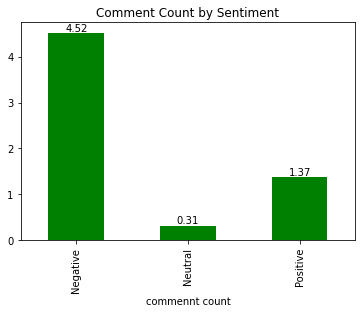

In [29]:
sentiment_comment_counts.plot(kind='bar', color='green')
plt.xlabel('commennt count')
plt.title('Comment Count by Sentiment')
# Annotate each bar with its value
for index, value in enumerate(sentiment_comment_counts):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

Negative sentiment comments have the highest average comment count (4.52), indicating more engagement for negative sentiments.
Positive sentiment comments have the lowest average comment count (1.37), suggesting comparatively less engagement for positive sentiments.
Neutral sentiment comments fall in between, with an average comment count of 0.31.

In [30]:
sentiment_reaction_counts = comments_data.groupby('sentiment')['reaction_count'].mean()
sentiment_reaction_counts

sentiment
Negative    13.661972
Neutral      2.464115
Positive     7.964844
Name: reaction_count, dtype: float64

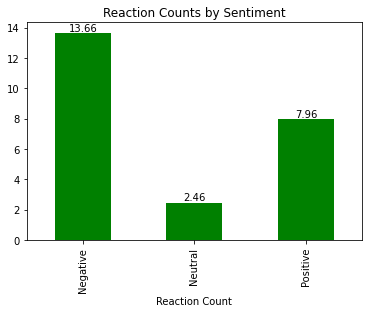

In [31]:
sentiment_reaction_counts.plot(kind='bar', color='green')
plt.xlabel('Reaction Count')
plt.title('Reaction Counts by Sentiment')
# Annotate each bar with its value
for index, value in enumerate(sentiment_reaction_counts):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

Negative sentiment comments have the highest average reaction count (13.66), indicating a higher level of reaction (likes, etc.) for negative sentiments.
Positive sentiment comments have a lower average reaction count (7.96), suggesting relatively fewer reactions for positive sentiments.
Neutral sentiment comments fall in between, with an average reaction count of 2.46.

In [32]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data)
    wordcloud = WordCloud(scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

### 5. What are the Prevalent words expressed in comments by football fans on facebook

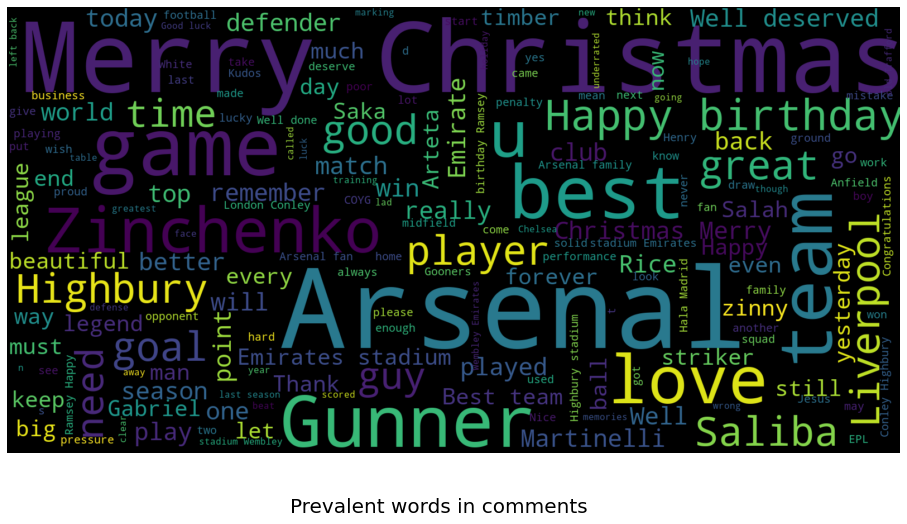

In [33]:
show_wordcloud(comments_data['text'], title = 'Prevalent words in comments')

### 6. What are the common words expressed in positive comments by football fans

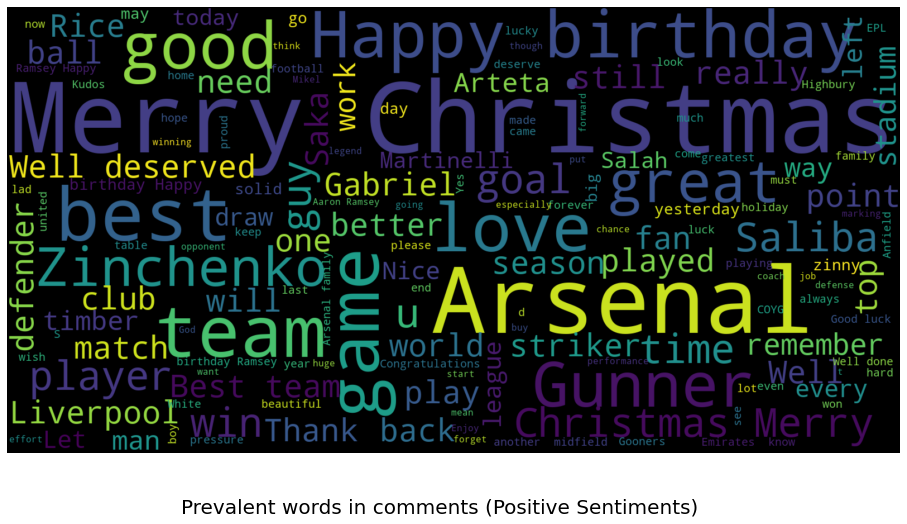

In [34]:
show_wordcloud(comments_data.loc[comments_data['sentiment']=='Positive','text'], title = 'Prevalent words in comments (Positive Sentiments)')

### 7. What are the common words in hate/negative discourse expressed by football fans against soccer players on Facebook?

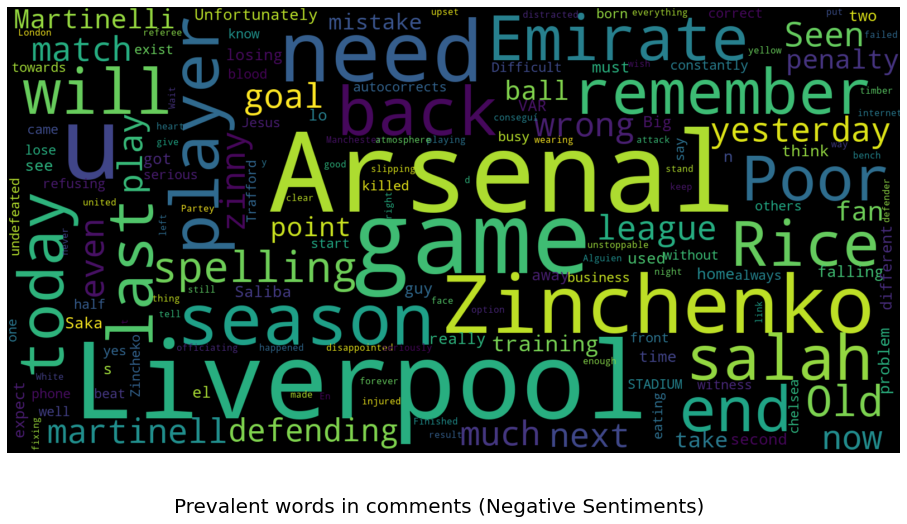

In [35]:
show_wordcloud(comments_data.loc[comments_data['sentiment']=='Negative','text'], title = 'Prevalent words in comments (Negative Sentiments)')

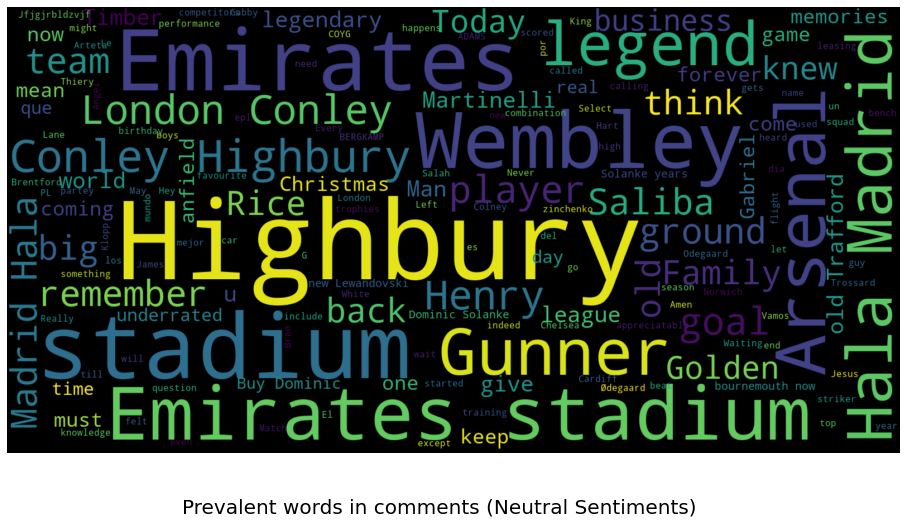

In [36]:
show_wordcloud(comments_data.loc[comments_data['sentiment']=='Neutral','text'], title = 'Prevalent words in comments (Neutral Sentiments)')

# Key Insights


__Account Verification__: Over 99% of users have unverified accounts, emphasizing the prevalence of non-verified profiles on social media.

__Gender Distribution__: Male users dominate the comment section, followed by females, while neuter and unknown gender users contribute less.

__Verification Status__: The majority of authors, regardless of gender, are not verified. Analysis suggests that verification status does not strongly correlate with sentiment expression.

__Sentiment Analysis__: Approximately 64.65% of comments are positive, 26.39% are neutral, and 8.96% are negative. Male and female users express similar sentiment distributions, with neuter and unknown genders predominantly expressing positive sentiments.

__Verified Authors__: The limited number of verified users includes both positive and negative sentiments. Verified authors have a comment count of 0 and a reaction count of 1, indicating a notable difference in engagement compared to unverified authors.

__Demographic Engagement Patterns__: Female authors receive an average of 4.41 reactions per comment, while male authors have a higher engagement with approximately 7.30 reactions. Neuter and unknown gender authors receive notably high average reactions of 8 and 8.83 per comment, respectively.

__Unknown Gender Category__: The unknown gender category predominantly consists of positive comments, warranting further investigation into this group's characteristics and engagement patterns.

__Sentiment and Engagement__: Negative sentiment comments attract the highest average comment count (4.52) and reaction count (13.66), while positive sentiment comments have lower averages (1.37 for comments, 7.96 for reactions), indicating strong engagement for negative sentiments.

__Word Cloud Analysis__: Word cloud visualizations offer insights into prevalent words in comments, categorized by sentiment, providing guidance for content creators to understand fan language.


# Conclusion

The comprehensive exploration serves as a valuable resource for social media strategists, content creators, and researchers seeking to delve into the intricacies of football fan interactions on social platforms

This analysis provides a foundational understanding of football fan engagement on social media, highlighting the importance of ongoing monitoring and additional analyses to delve deeper into fan behavior and preferences.